In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
athletes = pd.read_csv('athlete_events.csv')
noc = pd.read_csv('noc_regions.csv')

In [3]:
athletes

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN
271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN
271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN


In [4]:
athletes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [5]:
noc

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN
...,...,...,...
225,YEM,Yemen,NaN
226,YMD,Yemen,South Yemen
227,YUG,Serbia,Yugoslavia
228,ZAM,Zambia,NaN


In [6]:
noc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230 entries, 0 to 229
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   NOC     230 non-null    object
 1   region  227 non-null    object
 2   notes   21 non-null     object
dtypes: object(3)
memory usage: 5.5+ KB


In [7]:
noc.loc[noc['region'].isnull()]

,NOC,region,notes
168,ROT,NaN,Refugee Olympic Team
208,TUV,NaN,Tuvalu
213,UNK,NaN,Unknown


In [8]:
olympics_df = pd.merge(athletes, noc, on = 'NOC', how = 'left')
olympics_df = olympics_df.rename(columns = {'region' : 'Region', 'notes' : 'Notes'})
olympics_df

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Region,Notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN,Poland,NaN
271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN,Poland,NaN
271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN,Poland,NaN
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN,Poland,NaN


In [9]:
olympics_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 271116 entries, 0 to 271115
Data columns (total 17 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
 15  Region  270746 non-null  object 
 16  Notes   5039 non-null    object 
dtypes: float64(3), int64(2), object(12)
memory usage: 37.2+ MB


In [10]:
olympics_df.describe()

,ID,Age,Height,Weight,Year
count,271116.000000,261642.000000,210945.000000,208241.000000,271116.000000
mean,68248.954396,25.556898,175.338970,70.702393,1978.378480
std,39022.286345,6.393561,10.518462,14.348020,29.877632
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.250000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


In [11]:
olympics_df.isna().any()

ID        False
Name      False
Sex       False
Age        True
Height     True
Weight     True
Team      False
NOC       False
Games     False
Year      False
Season    False
City      False
Sport     False
Event     False
Medal      True
Region     True
Notes      True
dtype: bool

In [12]:
olympics_df.isna().sum()

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
Region       370
Notes     266077
dtype: int64

In [13]:
olympics_df.query("Team == 'India'")

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Region,Notes
505,281,S. Abdul Hamid,M,NaN,NaN,NaN,India,IND,1928 Summer,1928,Summer,Amsterdam,Athletics,Athletics Men's 110 metres Hurdles,NaN,India,NaN
506,281,S. Abdul Hamid,M,NaN,NaN,NaN,India,IND,1928 Summer,1928,Summer,Amsterdam,Athletics,Athletics Men's 400 metres Hurdles,NaN,India,NaN
895,512,Shiny Kurisingal Abraham-Wilson,F,19.0,167.0,53.0,India,IND,1984 Summer,1984,Summer,Los Angeles,Athletics,Athletics Women's 800 metres,NaN,India,NaN
896,512,Shiny Kurisingal Abraham-Wilson,F,19.0,167.0,53.0,India,IND,1984 Summer,1984,Summer,Los Angeles,Athletics,Athletics Women's 4 x 400 metres Relay,NaN,India,NaN
897,512,Shiny Kurisingal Abraham-Wilson,F,23.0,167.0,53.0,India,IND,1988 Summer,1988,Summer,Seoul,Athletics,Athletics Women's 800 metres,NaN,India,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264139,132177,Mohammad Anas Yahiya,M,21.0,177.0,69.0,India,IND,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,Athletics Men's 4 x 400 metres Relay,NaN,India,NaN
265876,133029,"Thyadathuvilla Chandrapillai ""T. C."" Yohannan",M,29.0,174.0,62.0,India,IND,1976 Summer,1976,Summer,Montreal,Athletics,Athletics Men's Long Jump,NaN,India,NaN
266934,133554,Sayed Muhammad Yusuf,M,NaN,NaN,NaN,India,IND,1928 Summer,1928,Summer,Amsterdam,Hockey,Hockey Men's Hockey,Gold,India,NaN
270912,135480,Geeta Zutshi,F,23.0,167.0,51.0,India,IND,1980 Summer,1980,Summer,Moskva,Athletics,Athletics Women's 800 metres,NaN,India,NaN


Text(0.5, 1.0, 'Top Countries with most Athletes')

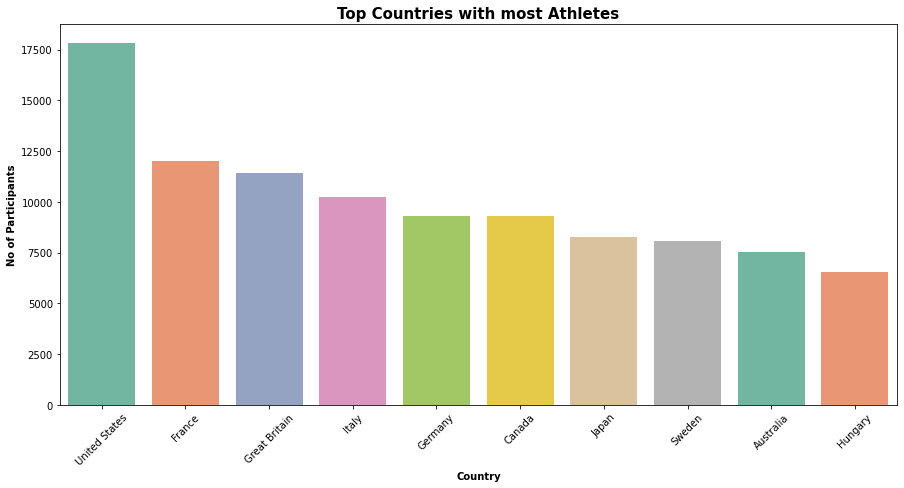

In [14]:
# country with most athletes

top_10_countries = olympics_df['Team'].value_counts().head(10)

plt.figure(figsize = (15, 7))
sns.barplot(x = top_10_countries.index, y = top_10_countries, palette = 'Set2' )
plt.xticks(rotation = 45, fontsize = 10)
plt.xticks(fontsize = 10)
plt.xlabel('Country', fontsize = 10, fontweight = 'bold')
plt.ylabel('No of Participants', fontsize = 10, fontweight = 'bold')
plt.title('Top Countries with most Athletes', fontsize = 15, fontweight = 'bold')

(array([1.0770e+03, 3.1226e+04, 9.8831e+04, 7.8913e+04, 3.2078e+04,
        1.0606e+04, 4.5050e+03, 2.1900e+03, 1.0830e+03, 4.7500e+02,
        3.0400e+02, 2.2500e+02, 1.0500e+02, 1.3000e+01, 6.0000e+00,
        3.0000e+00, 0.0000e+00]),
 array([10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90,
        95]),
 <BarContainer object of 17 artists>)

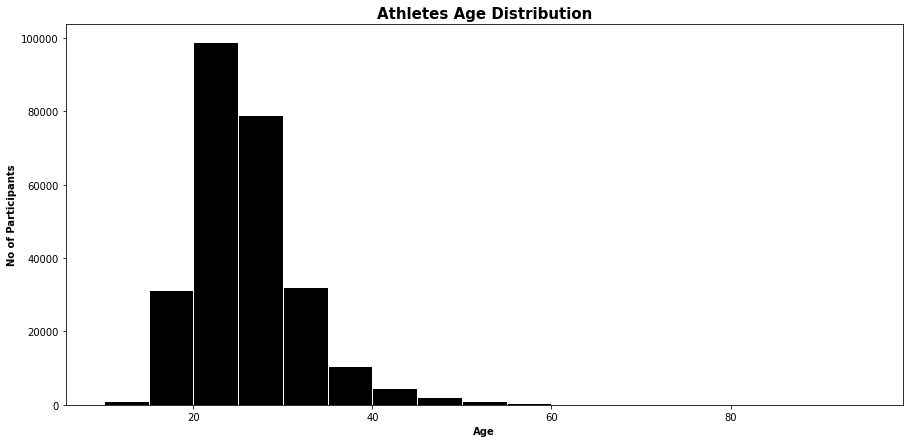

In [15]:
plt.figure(figsize = (15, 7))
plt.xlabel('Age', fontsize = 10, fontweight = 'bold')
plt.ylabel('No of Participants', fontsize = 10, fontweight = 'bold')
plt.title('Athletes Age Distribution', fontsize = 15, fontweight = 'bold')
plt.hist(olympics_df['Age'], bins = np.arange(10,100,5), color = 'black', edgecolor = 'white')

(array([0.0000e+00, 8.0000e+00, 1.9000e+01, 1.2800e+02, 3.8200e+02,
        9.2200e+02, 3.1390e+03, 7.5620e+03, 1.8704e+04, 2.8929e+04,
        3.8305e+04, 3.6375e+04, 3.5883e+04, 2.1611e+04, 1.1755e+04,
        4.6230e+03, 1.7990e+03, 5.2400e+02, 2.0300e+02, 5.7000e+01,
        1.4000e+01, 3.0000e+00, 0.0000e+00]),
 array([120, 125, 130, 135, 140, 145, 150, 155, 160, 165, 170, 175, 180,
        185, 190, 195, 200, 205, 210, 215, 220, 225, 230, 235]),
 <BarContainer object of 23 artists>)

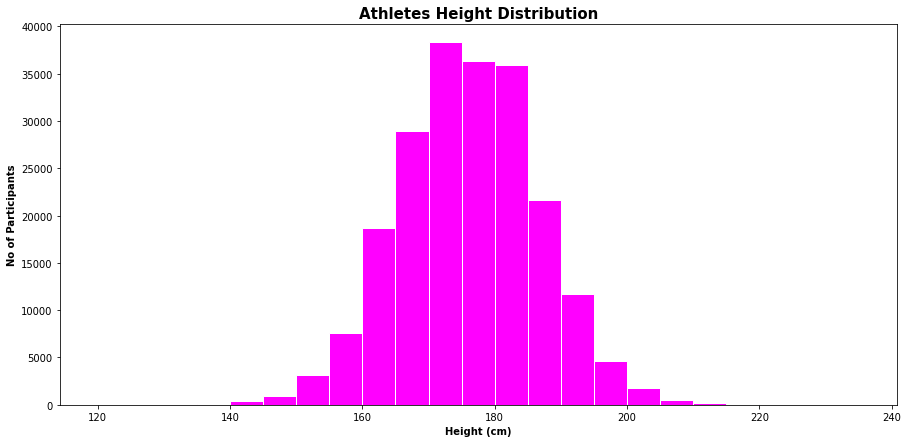

In [16]:
plt.figure(figsize = (15, 7))
plt.xlabel('Height (cm)', fontsize = 10, fontweight = 'bold')
plt.ylabel('No of Participants', fontsize = 10, fontweight = 'bold')
plt.title('Athletes Height Distribution', fontsize = 15, fontweight = 'bold')
plt.hist(olympics_df['Height'], bins = np.arange(120,240,5), color = 'magenta', edgecolor = 'white')

(array([0.0000e+00, 2.0000e+01, 2.3000e+02, 7.9300e+02, 1.9380e+03,
        5.6410e+03, 1.3830e+04, 2.2142e+04, 2.9188e+04, 2.8765e+04,
        3.0381e+04, 2.4245e+04, 1.8908e+04, 1.1970e+04, 8.5910e+03,
        4.6720e+03, 2.8020e+03, 1.2760e+03, 8.1000e+02, 5.3500e+02,
        5.2600e+02, 3.5000e+02, 2.8500e+02, 1.0700e+02, 9.0000e+01,
        5.8000e+01, 2.6000e+01, 1.4000e+01, 2.5000e+01, 7.0000e+00,
        5.0000e+00, 4.0000e+00, 3.0000e+00, 0.0000e+00, 1.0000e+00,
        1.0000e+00, 0.0000e+00, 0.0000e+00, 2.0000e+00]),
 array([ 20,  25,  30,  35,  40,  45,  50,  55,  60,  65,  70,  75,  80,
         85,  90,  95, 100, 105, 110, 115, 120, 125, 130, 135, 140, 145,
        150, 155, 160, 165, 170, 175, 180, 185, 190, 195, 200, 205, 210,
        215]),
 <BarContainer object of 39 artists>)

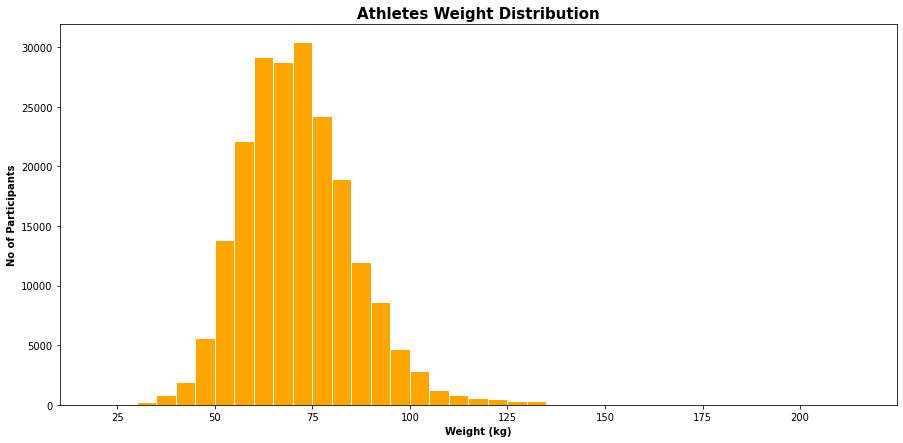

In [17]:
plt.figure(figsize = (15, 7))
plt.xlabel('Weight (kg)', fontsize = 10, fontweight = 'bold')
plt.ylabel('No of Participants', fontsize = 10, fontweight = 'bold')
plt.title('Athletes Weight Distribution', fontsize = 15, fontweight = 'bold')
plt.hist(olympics_df['Weight'], bins = np.arange(20,220,5), color = 'orange', edgecolor = 'white')

In [18]:
# winter sports

olympics_df.loc[olympics_df['Season'] == 'Winter', 'Sport'].unique()

array(['Speed Skating', 'Cross Country Skiing', 'Ice Hockey', 'Biathlon',
       'Alpine Skiing', 'Luge', 'Bobsleigh', 'Figure Skating',
       'Nordic Combined', 'Freestyle Skiing', 'Ski Jumping', 'Curling',
       'Snowboarding', 'Short Track Speed Skating', 'Skeleton',
       'Military Ski Patrol', 'Alpinism'], dtype=object)

In [19]:
# summer sports

olympics_df.loc[olympics_df['Season'] == 'Summer', 'Sport'].unique()

array(['Basketball', 'Judo', 'Football', 'Tug-Of-War', 'Athletics',
       'Swimming', 'Badminton', 'Sailing', 'Gymnastics',
       'Art Competitions', 'Handball', 'Weightlifting', 'Wrestling',
       'Water Polo', 'Hockey', 'Rowing', 'Fencing', 'Equestrianism',
       'Shooting', 'Boxing', 'Taekwondo', 'Cycling', 'Diving', 'Canoeing',
       'Tennis', 'Modern Pentathlon', 'Golf', 'Softball', 'Archery',
       'Volleyball', 'Synchronized Swimming', 'Table Tennis', 'Baseball',
       'Rhythmic Gymnastics', 'Rugby Sevens', 'Trampolining',
       'Beach Volleyball', 'Triathlon', 'Rugby', 'Lacrosse', 'Polo',
       'Cricket', 'Ice Hockey', 'Racquets', 'Motorboating', 'Croquet',
       'Figure Skating', 'Jeu De Paume', 'Roque', 'Basque Pelota',
       'Alpinism', 'Aeronautics'], dtype=object)

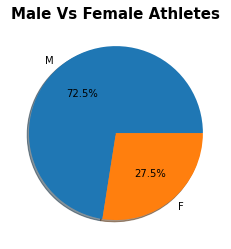

In [20]:
gender_counts = olympics_df['Sex'].value_counts()
plt.pie(gender_counts, labels = gender_counts.index, autopct = '%1.1f%%', shadow = True)
plt.title('Male Vs Female Athletes', fontsize = 15, fontweight = 'bold')
plt.show()

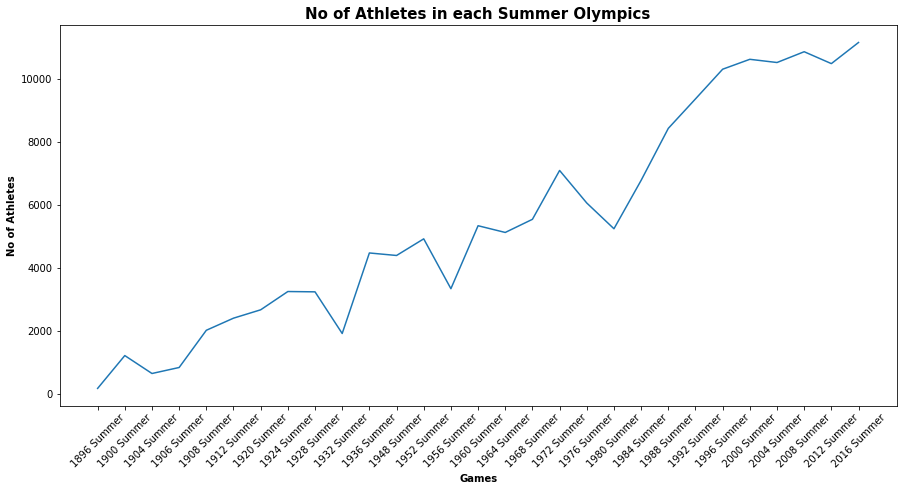

In [21]:
# no of athletes in each summer olympic games

filt = olympics_df['Season'] == 'Summer'
aso = olympics_df.loc[filt].groupby('Games')['Name'].nunique()
plt.figure(figsize = (15, 7))
sns.lineplot(x = aso.index, y = aso, palette = 'bright')
plt.xticks(rotation = 45, fontsize = 10)
plt.xticks(fontsize = 10)
plt.xlabel('Games', fontsize = 10, fontweight = 'bold')
plt.ylabel('No of Athletes', fontsize = 10, fontweight = 'bold')
plt.title('No of Athletes in each Summer Olympics', fontsize = 15, fontweight = 'bold')
plt.show()

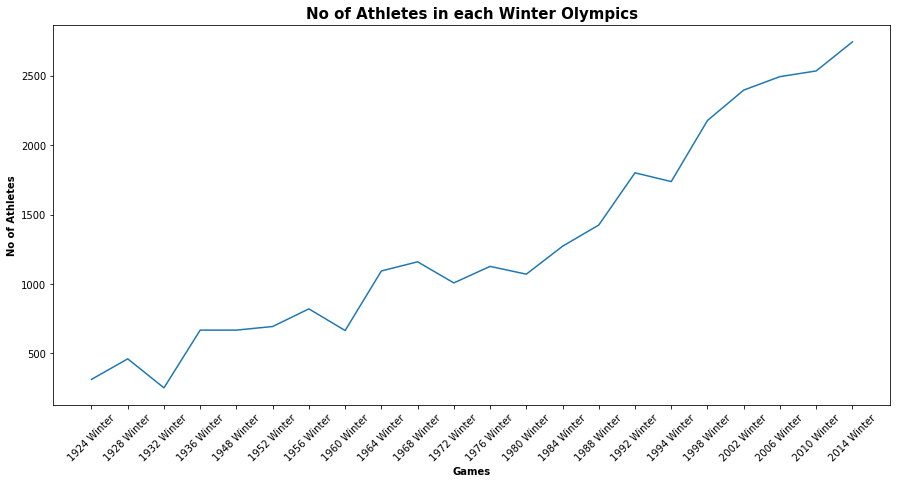

In [22]:
# no of athletes in each winter olympic games

filt = olympics_df['Season'] == 'Winter'
awo = olympics_df.loc[filt].groupby('Games')['Name'].nunique()
plt.figure(figsize = (15, 7))
sns.lineplot(x = awo.index, y = awo, palette = 'bright')
plt.xticks(rotation = 45, fontsize = 10)
plt.xticks(fontsize = 10)
plt.xlabel('Games', fontsize = 10, fontweight = 'bold')
plt.ylabel('No of Athletes', fontsize = 10, fontweight = 'bold')
plt.title('No of Athletes in each Winter Olympics', fontsize = 15, fontweight = 'bold')
plt.show()

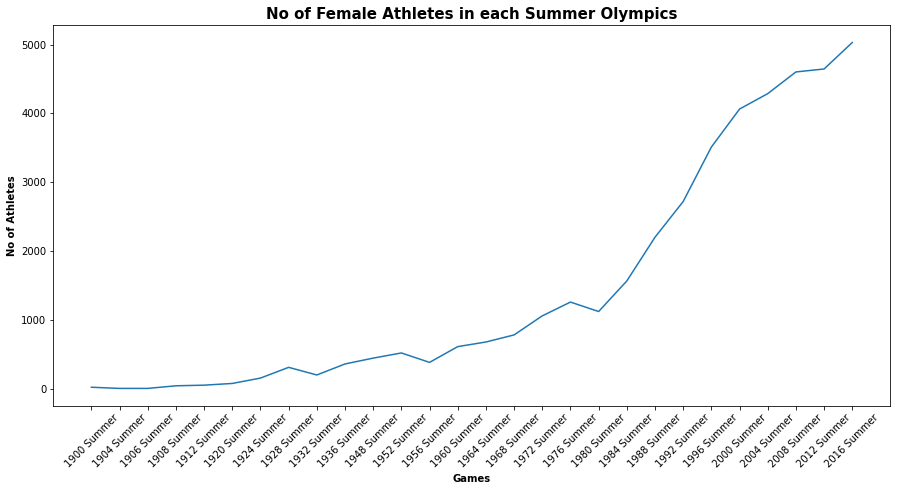

In [23]:
# no of female athletes in each summer olympic games

filt = (olympics_df['Season'] == 'Summer') & (olympics_df['Sex'] == 'F')
faso = olympics_df.loc[filt].groupby('Games')['Name'].nunique()
plt.figure(figsize = (15, 7))
sns.lineplot(x = faso.index, y = faso, palette = 'bright')
plt.xticks(rotation = 45, fontsize = 10)
plt.xticks(fontsize = 10)
plt.xlabel('Games', fontsize = 10, fontweight = 'bold')
plt.ylabel('No of Athletes', fontsize = 10, fontweight = 'bold')
plt.title('No of Female Athletes in each Summer Olympics', fontsize = 15, fontweight = 'bold')
plt.show()

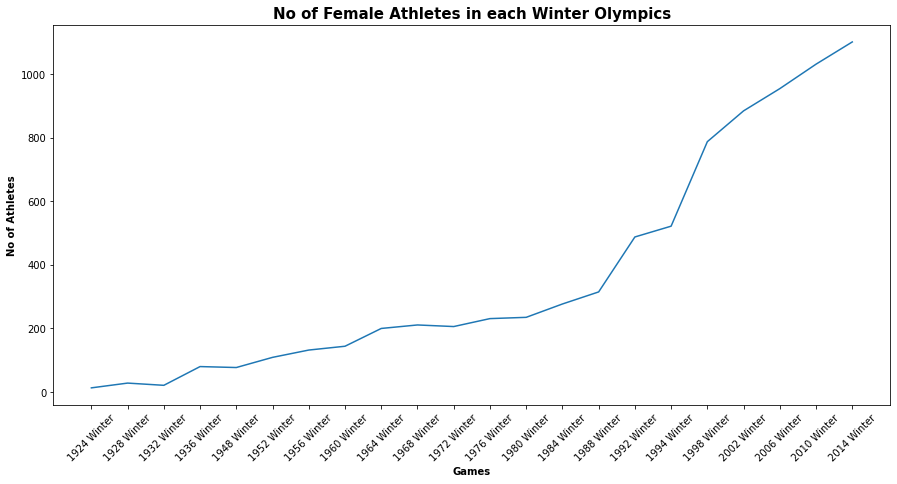

In [24]:
# no of female athletes in each winter olympic games

filt = (olympics_df['Season'] == 'Winter') & (olympics_df['Sex'] == 'F')
fawo = olympics_df.loc[filt].groupby('Games')['Name'].nunique()
plt.figure(figsize = (15, 7))
sns.lineplot(x = fawo.index, y = fawo, palette = 'bright')
plt.xticks(rotation = 45, fontsize = 10)
plt.xticks(fontsize = 10)
plt.xlabel('Games', fontsize = 10, fontweight = 'bold')
plt.ylabel('No of Athletes', fontsize = 10, fontweight = 'bold')
plt.title('No of Female Athletes in each Winter Olympics', fontsize = 15, fontweight = 'bold')
plt.show()

Text(0.5, 1.0, 'Top Countries with most Medals')

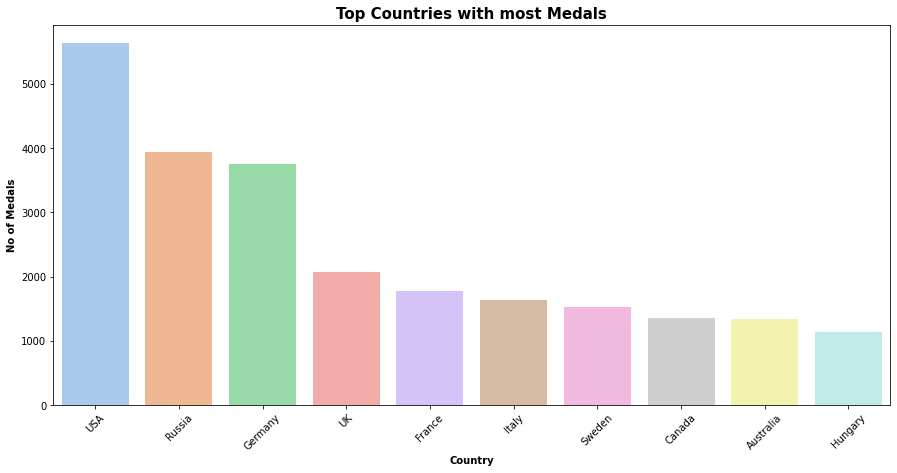

In [25]:
most_medals = olympics_df.loc[olympics_df['Medal'].notna()].groupby('Region').size().sort_values(ascending = False).head(10)

plt.figure(figsize = (15, 7))
sns.barplot(x = most_medals.index, y = most_medals, palette = 'pastel' )
plt.xticks(rotation = 45, fontsize = 10)
plt.xticks(fontsize = 10)
plt.xlabel('Country', fontsize = 10, fontweight = 'bold')
plt.ylabel('No of Medals', fontsize = 10, fontweight = 'bold')
plt.title('Top Countries with most Medals', fontsize = 15, fontweight = 'bold')

Text(0.5, 1.0, 'Top Countries with most Gold Medals')

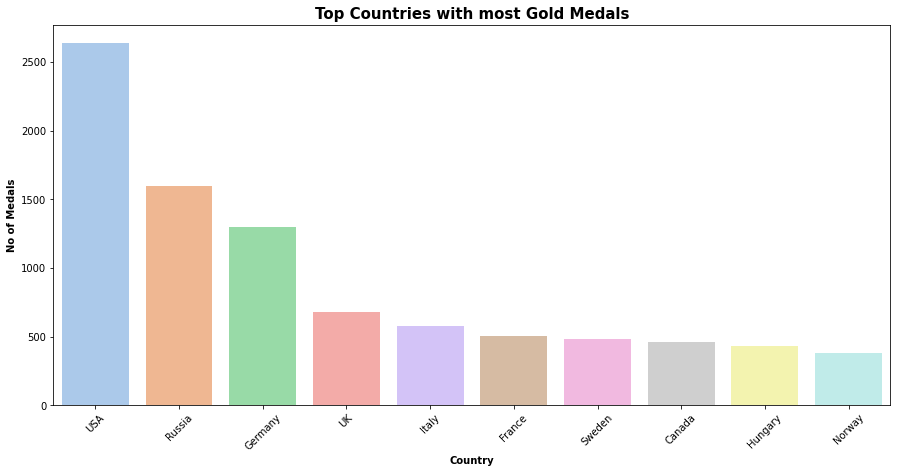

In [26]:
most_gold_medals = olympics_df.loc[olympics_df['Medal'] == 'Gold'].groupby('Region').size().sort_values(ascending = False).head(10)

plt.figure(figsize = (15, 7))
sns.barplot(x = most_gold_medals.index, y = most_gold_medals, palette = 'pastel' )
plt.xticks(rotation = 45, fontsize = 10)
plt.xticks(fontsize = 10)
plt.xlabel('Country', fontsize = 10, fontweight = 'bold')
plt.ylabel('No of Medals', fontsize = 10, fontweight = 'bold')
plt.title('Top Countries with most Gold Medals', fontsize = 15, fontweight = 'bold')

In [27]:
medals_tally = olympics_df.loc[olympics_df['Medal'].notna()].groupby(['Region', 'Medal'], as_index = False).size()
medals_tally

,Region,Medal,size
0,Afghanistan,Bronze,2
1,Algeria,Bronze,8
2,Algeria,Gold,5
3,Algeria,Silver,4
4,Argentina,Bronze,91
...,...,...,...
322,Zambia,Bronze,1
323,Zambia,Silver,1
324,Zimbabwe,Bronze,1
325,Zimbabwe,Gold,17


In [28]:
medals_tally = pd.pivot_table(medals_tally, values = 'size', index = 'Region', columns = 'Medal', aggfunc = np.sum)
medals_tally = medals_tally[['Gold', 'Silver', 'Bronze']]
medals_tally = medals_tally.fillna(0).astype(int)
medals_tally = medals_tally.sort_values(['Gold', 'Silver', 'Bronze'], ascending = [False, False, False])
medals_tally

Medal,Gold,Silver,Bronze
Region,,,
USA,2638,1641,1358
Russia,1599,1170,1178
Germany,1301,1195,1260
UK,678,739,651
Italy,575,531,531
...,...,...,...
Iraq,0,0,1
Macedonia,0,0,1
Mauritius,0,0,1


In [29]:
filt = (olympics_df['Medal'].notna()) & (olympics_df['Games'] == '2016 Summer')
rio_olympics_medals_tally = olympics_df.loc[filt].groupby(['Region', 'Medal'], as_index = False).size()
rio_olympics_medals_tally

,Region,Medal,size
0,Algeria,Silver,2
1,Argentina,Gold,21
2,Argentina,Silver,1
3,Armenia,Gold,1
4,Armenia,Silver,3
...,...,...,...
183,Uzbekistan,Silver,2
184,Venezuela,Bronze,2
185,Venezuela,Silver,1
186,Vietnam,Gold,1


In [30]:
# rio olympics 

rio_olympics_medals_tally = pd.pivot_table(rio_olympics_medals_tally, values = 'size', index = 'Region', columns = 'Medal', aggfunc = np.sum)
rio_olympics_medals_tally = rio_olympics_medals_tally[['Gold', 'Silver', 'Bronze']]
rio_olympics_medals_tally = rio_olympics_medals_tally.fillna(0).astype(int)
rio_olympics_medals_tally = rio_olympics_medals_tally.sort_values(['Gold', 'Silver', 'Bronze'], ascending = [False, False, False])
rio_olympics_medals_tally

Medal,Gold,Silver,Bronze
Region,,,
USA,139,54,71
UK,64,55,26
Russia,52,28,35
Germany,49,43,67
China,46,30,37
...,...,...,...
Finland,0,0,1
Morocco,0,0,1
Portugal,0,0,1


Text(0.5, 1.0, 'Height - Weight Distribution')

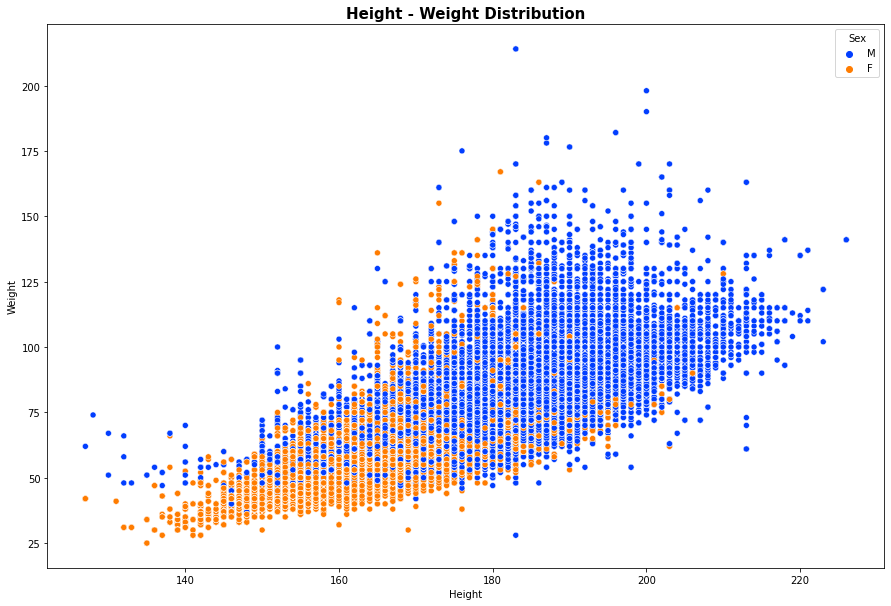

In [31]:
plt.figure(figsize = (15, 10))
sns.scatterplot(x = olympics_df['Height'], y = olympics_df['Weight'], hue = olympics_df['Sex'], palette = 'bright' )
plt.title('Height - Weight Distribution', fontsize = 15, fontweight = 'bold')